In [22]:
# Las librerías usadas para hacer el EDA será Pandas para la manipulación de los data sets, Pyplot para y Seaborn
# para tratar los gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df_int_tfij = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/int_tfij.xlsx')
df_tmov_tfij = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/tmov_tfij.xlsx')

El EDA se hará enfocado en la tendencia y penetración de los servicios en la comunidad

El primer análisis será enfocado en la adopción de las diferentes tecnologías de accesos a internet por parte de la población con el fin de entender hacia donde se dirige la tendencia del rubro

In [25]:
#creamos el dataset que usaremos para mostrar la información. En este caso enfocado a los accesos de las diferentes tecnologías a lo largo de los años
df_accptech_grouped = df_int_tfij.groupby('Año')[['Acceso por ADSL', 'Acceso por cablemodem',
                                                'Acceso por fibra optica', 'Acceso por wireless', 'Acceso por otros']].sum()

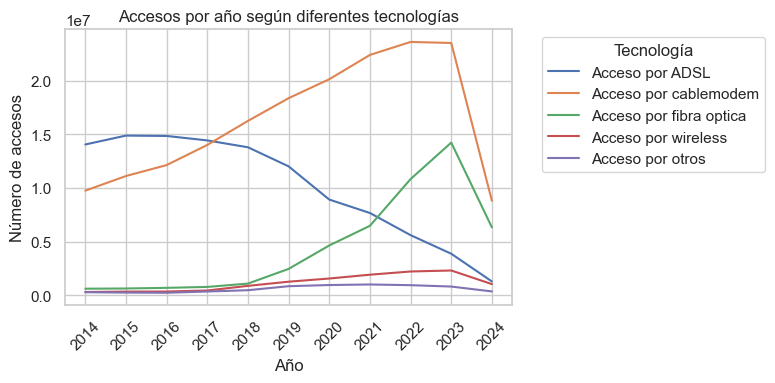

In [30]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
for tecnologia in df_accptech_grouped.columns:
    plt.plot(df_accptech_grouped.index, df_accptech_grouped[tecnologia], label=tecnologia)
plt.title('Accesos por año según diferentes tecnologías')
plt.xlabel('Año')
plt.ylabel('Número de accesos')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_accptech_grouped.index, rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

Del gráfico podemos ver que las tecnologías en aumento son fibra óptica y cablemodem, aunque esta última se aprecia que su crecimiento se está aplanando. Por el otro lado, también vemos que el ADSL es la tecnología que va en descenso

In [76]:
df_int_penpob = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Penetración-poblacion')

In [77]:
df_int_penpob = df_int_penpob[['Año', 'Provincia', 'Accesos por cada 100 hab']]

In [78]:
penpob_grouped = df_int_penpob.groupby(['Año', 'Provincia'])['Accesos por cada 100 hab'].mean().reset_index()
penpob_grouped.head(10)

,Año,Provincia,Accesos por cada 100 hab
0,2014,Buenos Aires,16.941258
1,2014,Capital Federal,43.110217
2,2014,Catamarca,6.299529
3,2014,Chaco,5.649310
4,2014,Chubut,12.502917
5,2014,Corrientes,5.999478
6,2014,Córdoba,16.426609
7,2014,Entre Ríos,10.456618
8,2014,Formosa,4.492856
9,2014,Jujuy,4.793449


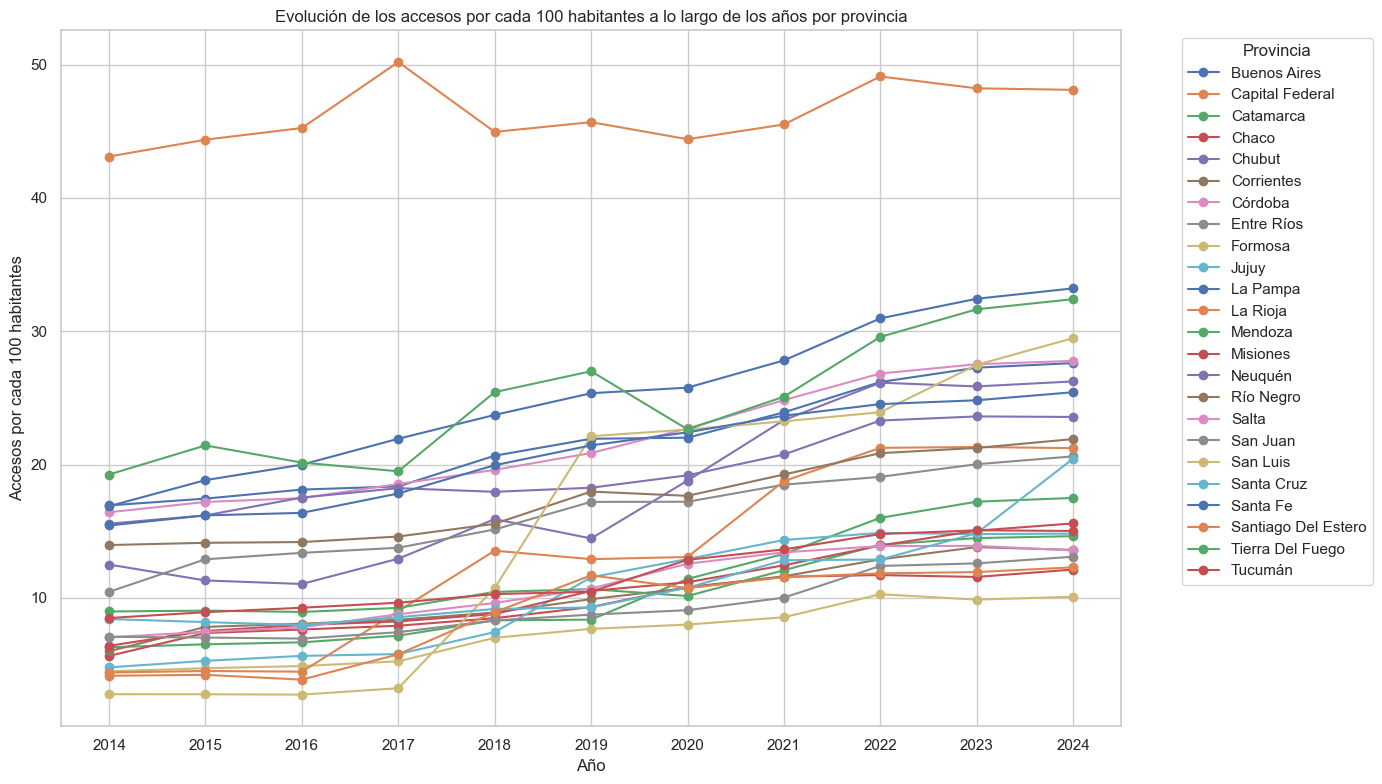

In [79]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
for provincia in penpob_grouped['Provincia'].unique():
    datos_provincia = penpob_grouped[penpob_grouped['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Accesos por cada 100 hab'], marker='o', label=provincia)
plt.title('Evolución de los accesos por cada 100 habitantes a lo largo de los años por provincia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicación de la leyenda fuera del gráfico
plt.xticks(sorted(penpob_grouped['Año'].unique()))  # Asegura que los años en el eje X estén en orden y sin duplicados
plt.tight_layout()  # Ajusta el gráfico para evitar solapamiento

In [80]:
crecimiento = penpob_grouped.groupby('Provincia')['Accesos por cada 100 hab'].agg(lambda x: x.max() - x.min()).reset_index() 
crecimiento.columns = ['Provincia', 'Crecimiento']
crecimiento.sort_values('Crecimiento', ascending=True, inplace=True)

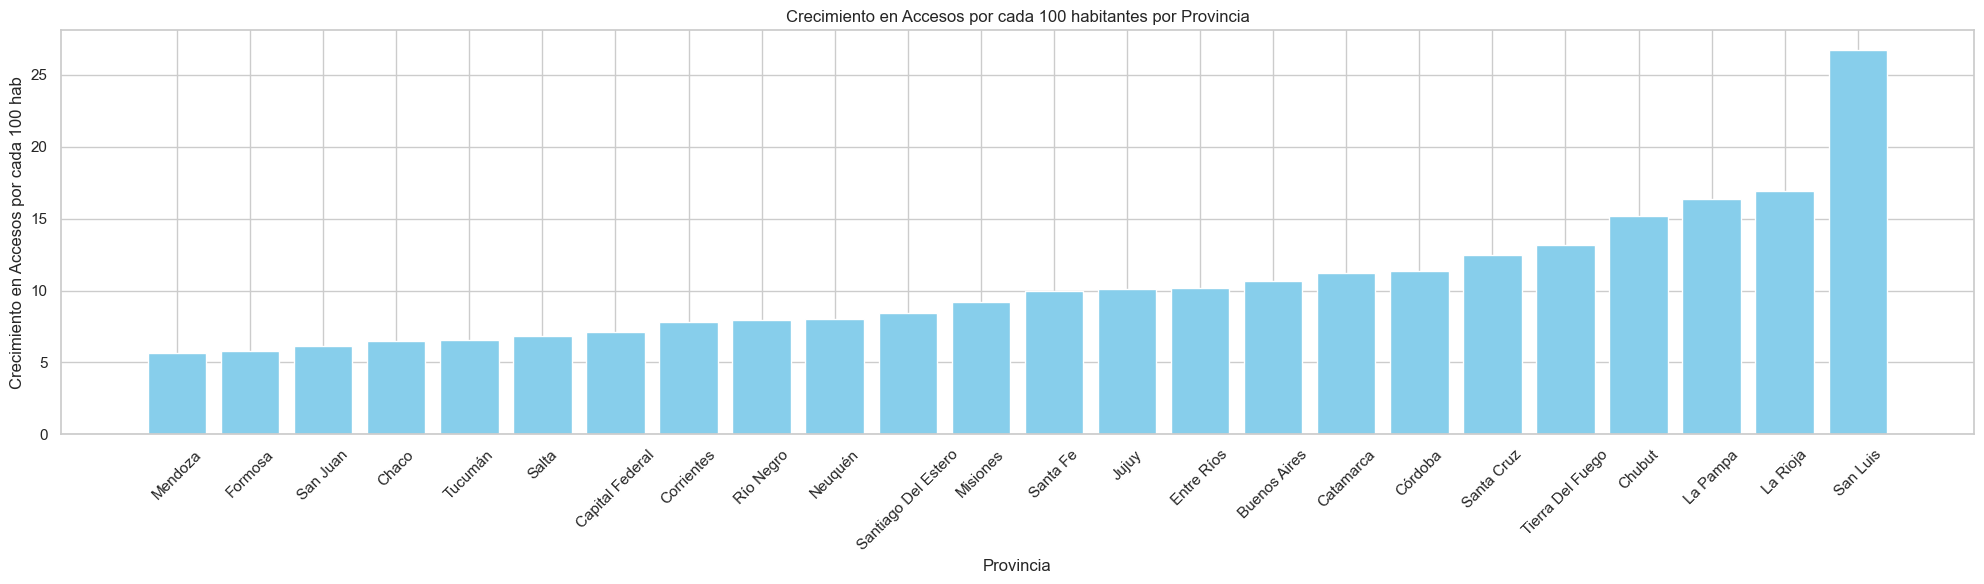

In [81]:
plt.figure(figsize=(20, 6)) 
plt.bar(crecimiento['Provincia'], crecimiento['Crecimiento'], color='skyblue') 
plt.xlabel('Provincia') 
plt.ylabel('Crecimiento en Accesos por cada 100 hab') 
plt.title('Crecimiento en Accesos por cada 100 habitantes por Provincia') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [82]:
df_int_vmd = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Totales VMD')
df_int_vmd = df_int_vmd[['Año', 'Trimestre', 'Mbps (Media de bajada)']]
vmd_grouped = df_int_vmd.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()
vmd_grouped.head(10)

,Año,Mbps (Media de bajada)
0,2014,3.849998
1,2015,4.668755
2,2016,5.695848
3,2017,8.532677
4,2018,14.595220
5,2019,22.537500
6,2020,39.717500
7,2021,47.385000
8,2022,70.642500
9,2023,125.790000


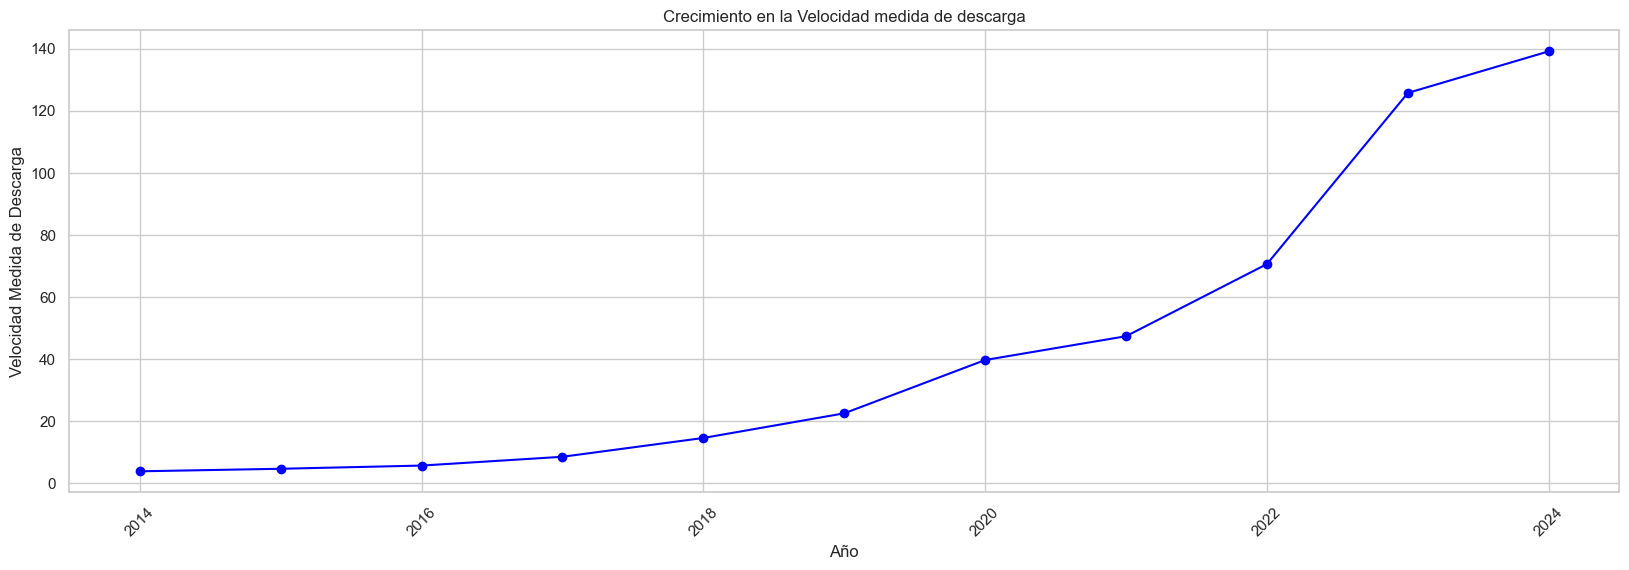

In [83]:

plt.figure(figsize=(20, 6)) 
plt.plot(vmd_grouped['Año'], vmd_grouped['Mbps (Media de bajada)'], color='blue', marker='o')
plt.xlabel('Año') 
plt.ylabel('Velocidad Medida de Descarga') 
plt.title('Crecimiento en la Velocidad medida de descarga')
plt.xticks(rotation=45)
plt.show()

In [106]:
df_int_pentot = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Penetracion-totales')
df_int_pentot = df_int_pentot[['Año', 'Trimestre', 'Accesos por cada 100 hab']]
int_pentot_grouped = df_int_pentot.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index()
int_pentot_grouped.head(10)

,Año,Accesos por cada 100 hab
0,2014,15.259364
1,2015,15.916863
2,2016,16.335457
3,2017,17.207378
4,2018,18.515000
5,2019,19.779117
6,2020,20.250465
7,2021,21.867256
8,2022,23.717403
9,2023,24.345000


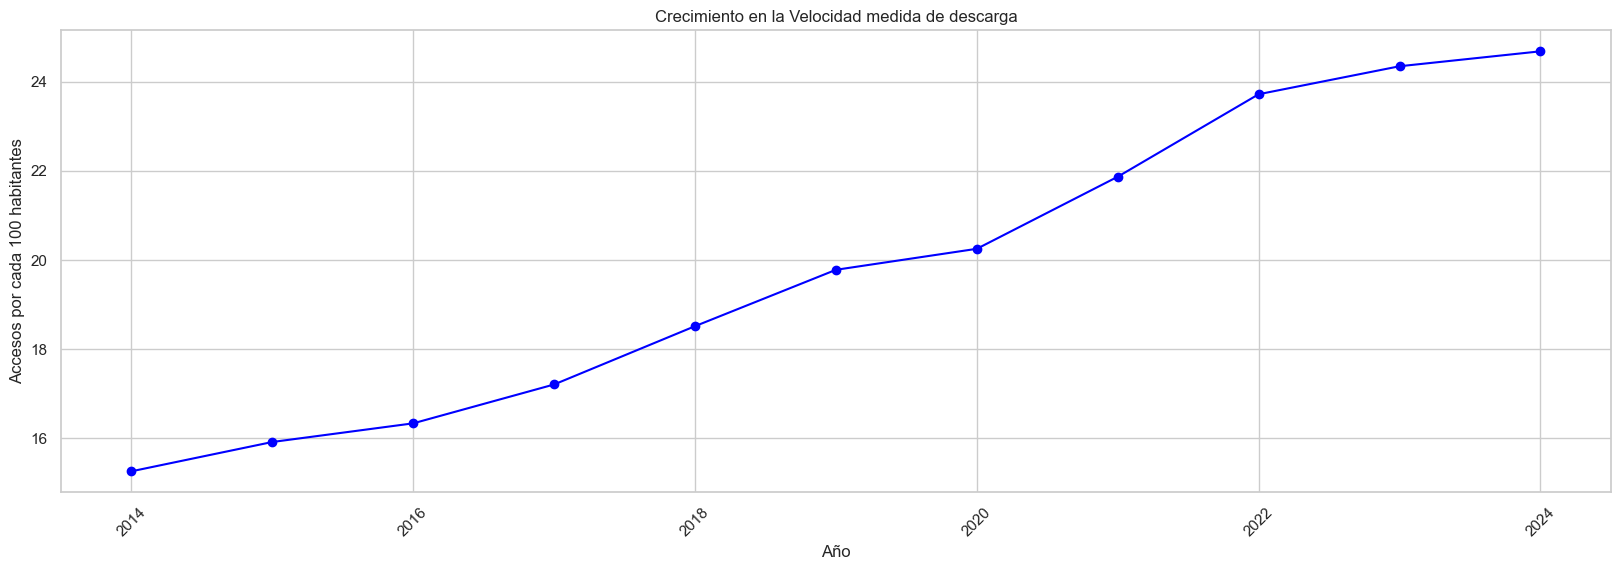

In [108]:
plt.figure(figsize=(20, 6)) 
plt.plot(int_pentot_grouped['Año'], int_pentot_grouped['Accesos por cada 100 hab'], color='blue', marker='o')
plt.xlabel('Año') 
plt.ylabel('Accesos por cada 100 habitantes') 
plt.title('Crecimiento en la Velocidad medida de descarga')
plt.xticks(rotation=45)
plt.show()

In [84]:
df_int_velprov = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Velocidad % por prov')

In [85]:
df_int_velprov = df_int_velprov[['Año', 'Provincia', 'Mbps (Media de bajada)']]

In [86]:
velprov_grouped = df_int_velprov.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().reset_index()
velprov_grouped.head(10)

,Año,Provincia,Mbps (Media de bajada)
0,2014,Buenos Aires,3.938247
1,2014,Capital Federal,4.373310
2,2014,Catamarca,2.992319
3,2014,Chaco,3.528954
4,2014,Chubut,3.168178
5,2014,Corrientes,3.450659
6,2014,Córdoba,3.674289
7,2014,Entre Ríos,3.419838
8,2014,Formosa,2.726423
9,2014,Jujuy,2.879411


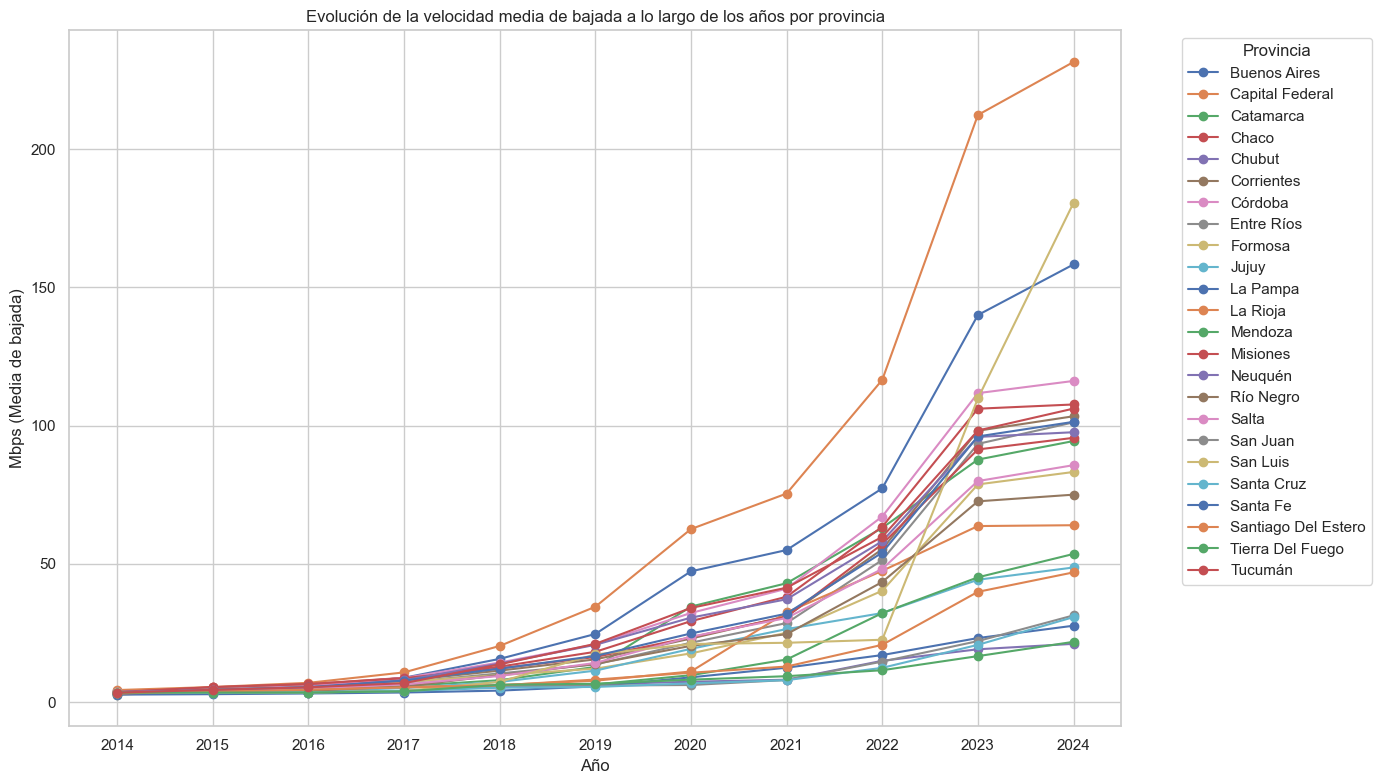

In [87]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
for provincia in velprov_grouped['Provincia'].unique():
    datos_provincia = velprov_grouped[velprov_grouped['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Mbps (Media de bajada)'], marker='o', label=provincia)
plt.title('Evolución de la velocidad media de bajada a lo largo de los años por provincia')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicación de la leyenda fuera del gráfico
plt.xticks(sorted(velprov_grouped['Año'].unique()))  # Asegura que los años en el eje X estén en orden y sin duplicados
plt.tight_layout()  # Ajusta el gráfico para evitar solapamiento

In [88]:
crecimiento2 = velprov_grouped.groupby('Provincia')['Mbps (Media de bajada)'].agg(lambda x: x.max() - x.min()).reset_index() 
crecimiento2.columns = ['Provincia', 'Crecimiento']
crecimiento2.sort_values('Crecimiento', ascending=True, inplace=True)

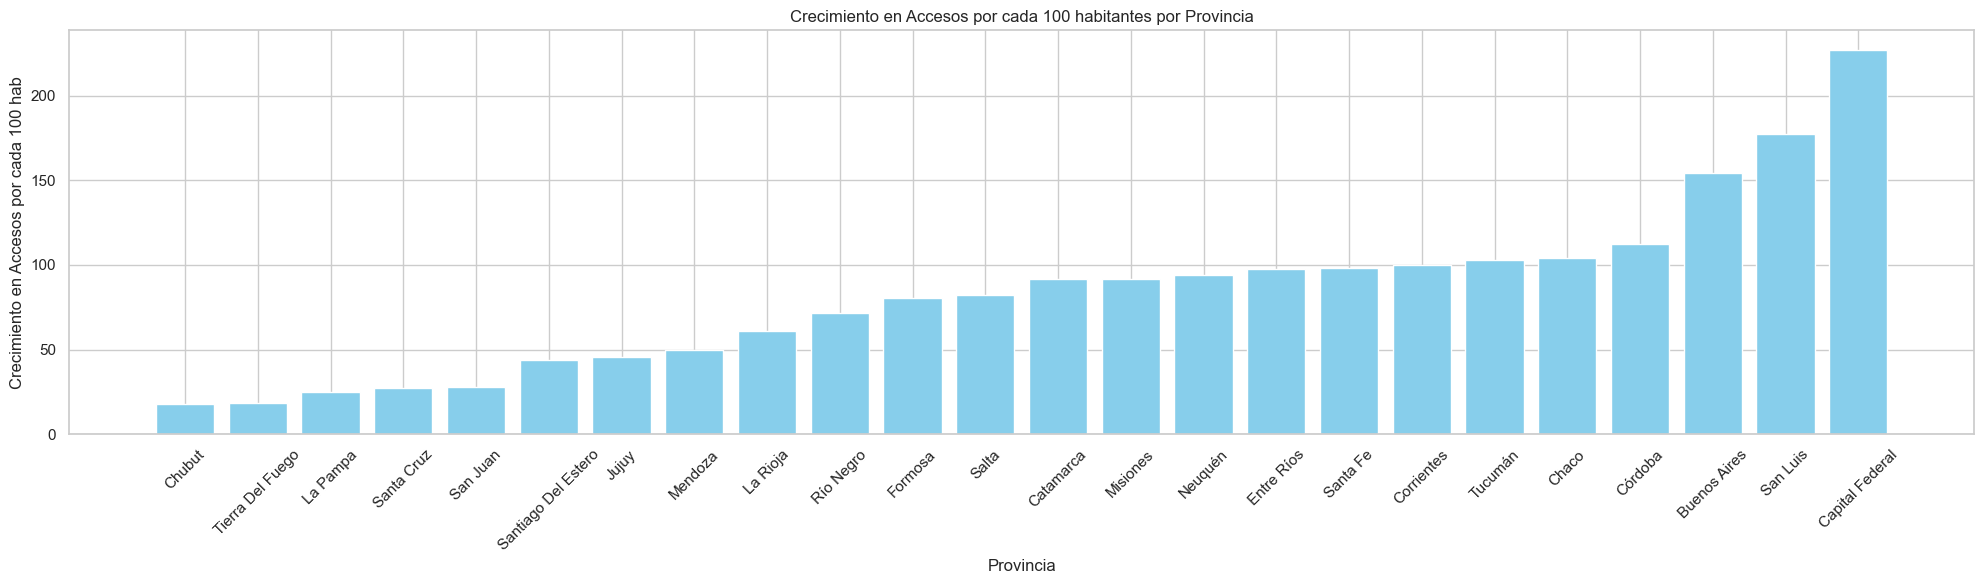

In [89]:
plt.figure(figsize=(20, 6)) 
plt.bar(crecimiento2['Provincia'], crecimiento2['Crecimiento'], color='skyblue') 
plt.xlabel('Provincia') 
plt.ylabel('Crecimiento en Accesos por cada 100 hab') 
plt.title('Crecimiento en Accesos por cada 100 habitantes por Provincia') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [90]:
df_teffija_pentot = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/telefonia_fija.xlsx', sheet_name='Fija_penetracion_tot')

In [99]:
df_teffija_pentot = df_teffija_pentot[['Año', 'Trimestre', 'Accesos telefonía fija por cada 100 hab']]
tf_pentot_grouped = df_teffija_pentot.groupby('Año')['Accesos telefonía fija por cada 100 hab'].mean().reset_index()
tf_pentot_grouped.head(10)

,Año,Accesos telefonía fija por cada 100 hab
0,2014,22.496825
1,2015,23.235196
2,2016,23.510701
3,2017,23.510701
4,2018,21.818064
5,2019,17.859275
6,2020,16.420846
7,2021,15.921998
8,2022,15.611796
9,2023,15.612239


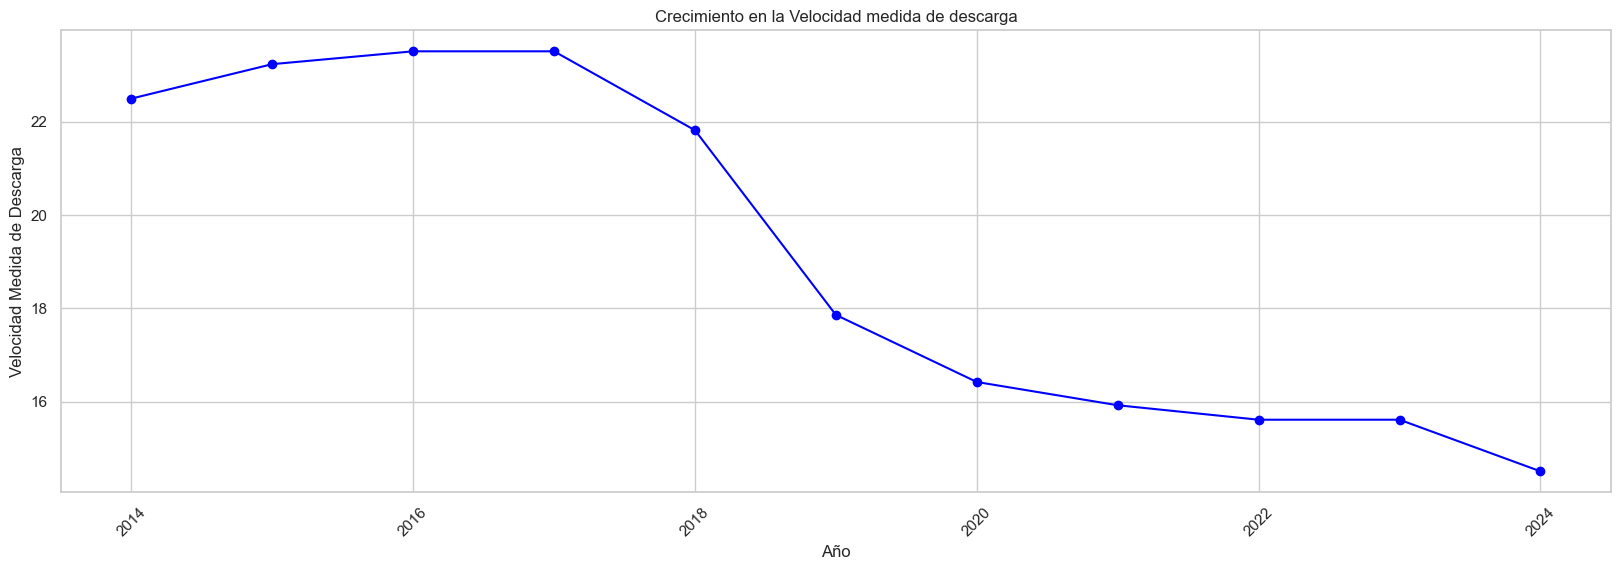

In [102]:
plt.figure(figsize=(20, 6)) 
plt.plot(tf_pentot_grouped['Año'], tf_pentot_grouped['Accesos telefonía fija por cada 100 hab'], color='blue', marker='o')
plt.xlabel('Año') 
plt.ylabel('Velocidad Medida de Descarga') 
plt.title('Crecimiento en la Velocidad medida de descarga')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#El gráfico anterior hay que contrastarlo con el acceso a internet y no con la velocidad de descsarga. 
# complementar con otra linea donde se muestre el acceso a llamadas por telefono celular

In [98]:
df_tefmov_pentot = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/telefonia_movil.xlsx', sheet_name='Penetracion')

In [100]:
df_tefmov_pentot = df_tefmov_pentot[['Año', 'Trimestre', 'Accesos por cada 100 hab']]
tm_pentot_grouped = df_tefmov_pentot.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index()
tm_pentot_grouped.head(10)

,Año,Accesos por cada 100 hab
0,2013,157.0825
1,2014,144.2775
2,2015,140.5925
3,2016,143.8350
4,2017,141.8475
5,2018,133.3800
6,2019,128.4125
7,2020,121.4775
8,2021,125.5825
9,2022,128.2375


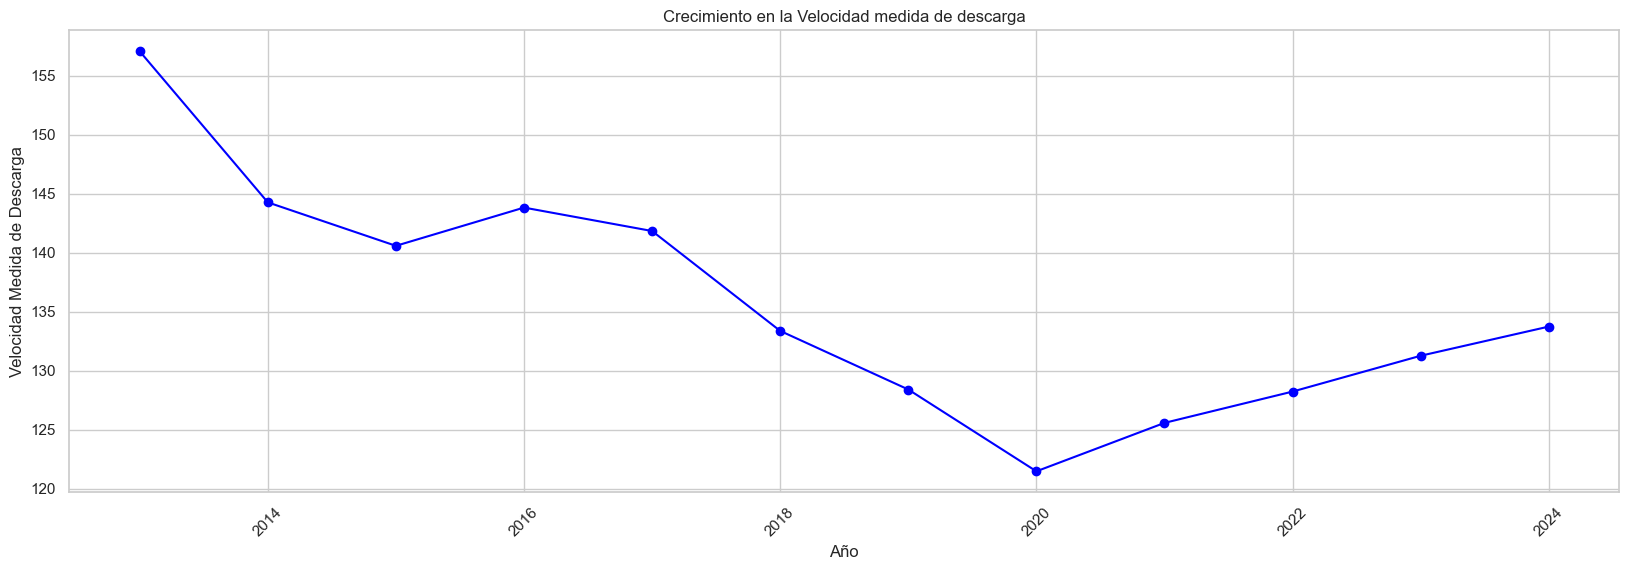

In [101]:
plt.figure(figsize=(20, 6)) 
plt.plot(tm_pentot_grouped['Año'], tm_pentot_grouped['Accesos por cada 100 hab'], color='blue', marker='o')
plt.xlabel('Año') 
plt.ylabel('Velocidad Medida de Descarga') 
plt.title('Crecimiento en la Velocidad medida de descarga')
plt.xticks(rotation=45)
plt.show()

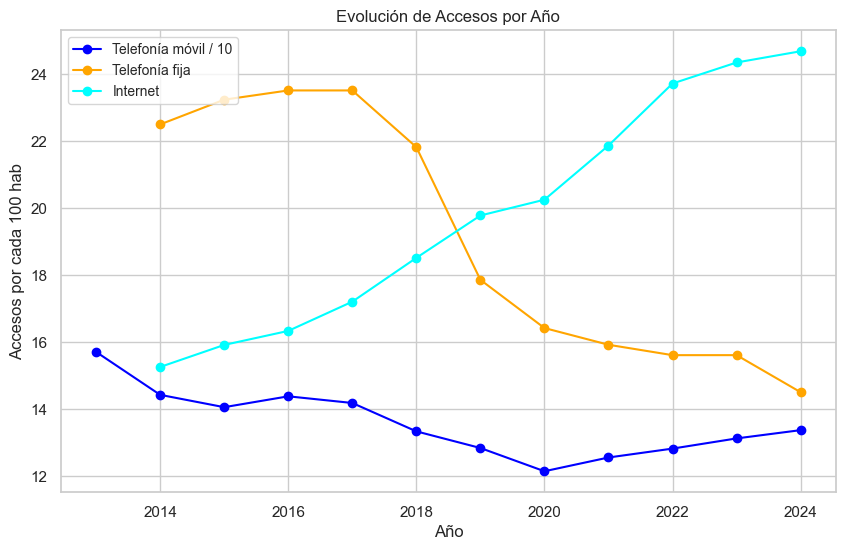

In [113]:
plt.figure(figsize=(10, 6))
# Graficar el primer DataFrame
linea_1 = plt.plot(tm_pentot_grouped['Año'], tm_pentot_grouped['Accesos por cada 100 hab']/10, color='blue', marker='o')

# Graficar el segundo DataFrame
linea_2 = plt.plot(tf_pentot_grouped['Año'], tf_pentot_grouped['Accesos telefonía fija por cada 100 hab'], color='orange', marker='o')

linea_3 = plt.plot(int_pentot_grouped['Año'], int_pentot_grouped['Accesos por cada 100 hab'], color='cyan', marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Evolución de Accesos por Año')
plt.legend(('Telefonía móvil / 10', 'Telefonía fija', 'Internet'),
prop = {'size': 10}, loc='upper left')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [ ]:
# Graficar el KPI propuesto y los creados